In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('walmart-sales-dataset-of-45stores.csv')

# Exploratory Data Analysis

In [4]:
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

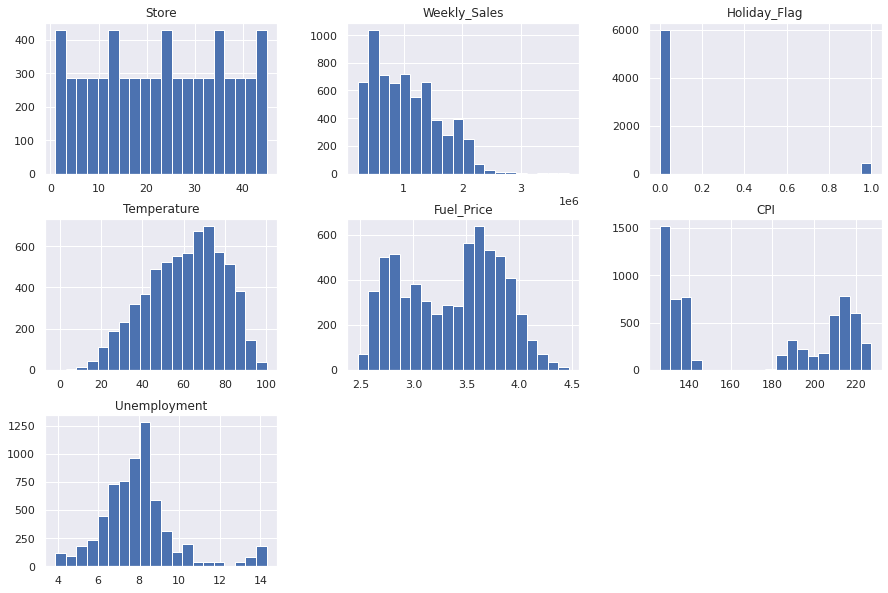

In [5]:
df.hist(figsize=(15,10), bins=20);

## Data Cleaning

In [6]:
df.describe() # No errors (i.e. negative Fuel_Price or Temperature of 1000)

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [7]:
df.duplicated().sum() # No duplicated rows

0

We need to change the Dtype of Date feature to datetime64[ns].

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
df.Date = pd.to_datetime(df.Date, dayfirst = True)

Also, we noticed that all Non-Null Count values are equal, therefore no null values.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


### Handling outliers

In [11]:
full_df = df

In [12]:
def drop_outliers(data, column, lower_limit, upper_limit):
    data = data[((data[column] < upper_limit) & (data[column] > lower_limit)) | data[column].isnull()]
    return data

In [13]:
def handle_outliers(data, column):
    quartile1 = full_df[column].quantile(.25)
    quartile3 = full_df[column].quantile(.75)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr

    outliers = full_df[(full_df[column] >= upper_limit) | (full_df[column] <= lower_limit)]

    outliers_proportion = len(outliers)/len(full_df) 

    print(f'{column} outlier limits: {lower_limit}, {upper_limit}')
    print(f'Outliers proportion: {outliers_proportion}')

    if outliers_proportion == 0:
        print(f'No outliers found in {column}.\n')
        plt.boxplot(data[column])
        plt.title(f'{column} boxplot');

    elif outliers_proportion <= 0.05: 
        data_before = full_df
        data_after = drop_outliers(data, column, lower_limit, upper_limit)
        print(f'{data_before.shape[0] - data_after.shape[0]} rows dropped\n')

        fig = plt.figure(figsize =(6, 4)) 
        ax = fig.add_axes([0, 0, 1, 1]) 
        ax.boxplot([data_before[column], data_after[column]])
        plt.xticks([1, 2], [f'{column} before', f'{column} after'])
        plt.title(f'Dropping {column} outliers');

        data = data_after

    else:  # In case we have many outliers, we won't drop them.
        print(f"We have too many outliers in {column} feature. We won't drop them.\n") 
        plt.boxplot(data[column])
        plt.title(f'{column} boxplot');

    return data

Even though Weekly_Sales feature has outliers, we won't drop them because it's completely normal to see the weekly sales insanely rise during holidays.



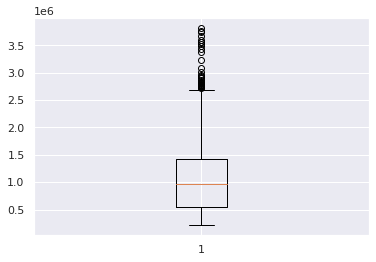

In [14]:
plt.boxplot(df.Weekly_Sales);

Handling Temperature outliers.

Temperature outlier limits: 6.240000000000002, 116.16
Outliers proportion: 0.0004662004662004662
3 rows dropped



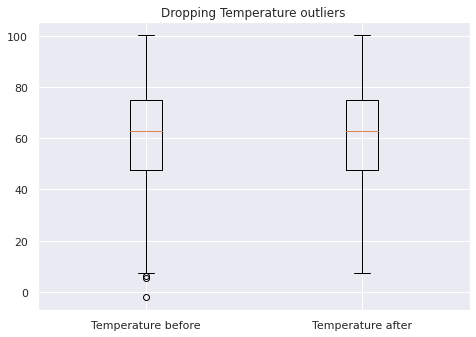

In [15]:
df = handle_outliers(df, 'Temperature');

Fuel_Price outlier limits: 1.7299999999999998, 4.938
Outliers proportion: 0.0
No outliers found in Fuel_Price.



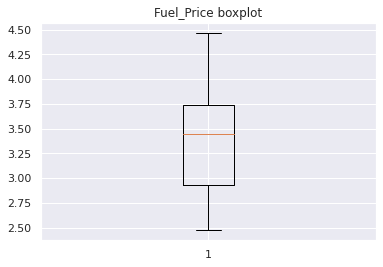

In [16]:
df = handle_outliers(df, 'Fuel_Price');

CPI outlier limits: 10.222559825000019, 334.255733625
Outliers proportion: 0.0
No outliers found in CPI.



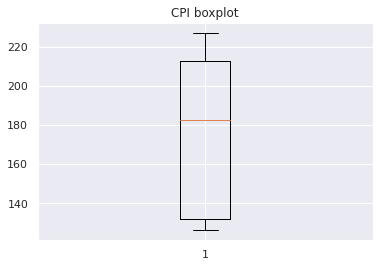

In [17]:
df = handle_outliers(df, 'CPI');

Unemployment outlier limits: 4.2945, 11.218499999999999
Outliers proportion: 0.07474747474747474
We have too many outliers in Unemployment feature. We won't drop them.



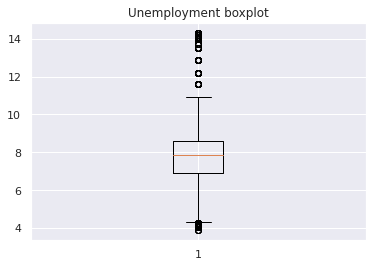

In [18]:
df = df = handle_outliers(df, 'Unemployment');

## Questions.

### Research question 1
### Which store has maximum sales?

Determining which store has the highest profit.

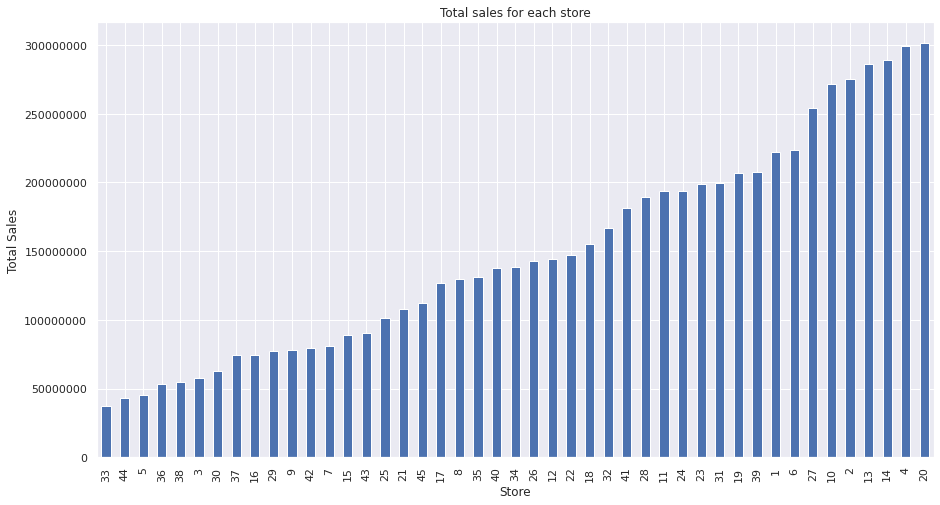

In [19]:
total_sales= df.groupby('Store')['Weekly_Sales'].sum().sort_values() 
plt.figure(figsize=(15,8))
plt.ticklabel_format(style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
total_sales.plot(kind='bar');

In [20]:
total_sales = total_sales.reset_index()

In [21]:
print(f"As we can see that store no {int(total_sales.iloc[-1][0])} has the highest sales with {total_sales.iloc[-1][1]}")

As we can see that store no 20 has the highest sales with 301397792.46


### Research question 2
### Which store has maximum standard deviation?

Determining which store has the most variation in total sales.

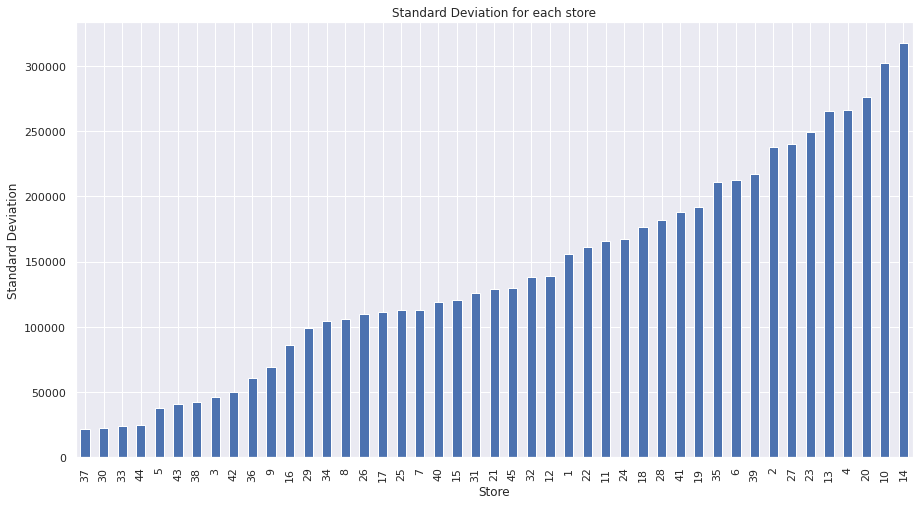

In [22]:
walmart_data_std = df.groupby('Store')['Weekly_Sales'].std().sort_values()
plt.figure(figsize=(15,8))
plt.ticklabel_format(style='plain', axis='y')
plt.title('Standard Deviation for each store')
plt.xlabel('Store')
plt.ylabel('Standard Deviation')
walmart_data_std.plot(kind='bar');

In [23]:
walmart_data_std = walmart_data_std.reset_index()

In [24]:
print(f"Thus, the store which has maximum standard deviation is store number {int(walmart_data_std.iloc[-1][0])} with {walmart_data_std.iloc[-1][1]}.")

Thus, the store which has maximum standard deviation is store number 14 with 317569.9494755081.


### Research question 3
### Find out holidays that have higher sales than the mean sales in the non-holiday season for all stores together.

In [25]:
month_numbers_list = [2, 9, 11, 12]
holidays_list = ['Super Bowl', 'Labor Day', 'Thanksgiving', 'Christmas'] 
holidays_sales_mean_dict = {}
for i in range(len(month_numbers_list)):
    sales_mean = df.query('Holiday_Flag == 1 & Date.dt.month == @month_numbers_list[@i]')['Weekly_Sales'].mean()
    holidays_sales_mean_dict[holidays_list[i]] = sales_mean

non_holiday_sales_mean = df.query('Holiday_Flag == 0')['Weekly_Sales'].mean()
print(f'Mean sales for each holiday:\n{holidays_sales_mean_dict}\n')
print(f'Mean sales for non holidays:\n{non_holiday_sales_mean}\n\n')

print('Therefore holidays that have higher sales than the mean sales in the non-holiday season:')
holidays_higher_dict = {} 
for holiday in list(holidays_sales_mean_dict.keys()) :
    if holidays_sales_mean_dict[holiday] > non_holiday_sales_mean:
        print(f'  - {holiday}.')
        holidays_higher_dict[holiday] = holidays_sales_mean_dict[holiday]

Mean sales for each holiday:
{'Super Bowl': 1079127.9877037038, 'Labor Day': 1042427.293925926, 'Thanksgiving': 1471273.427777778, 'Christmas': 960833.1115555555}

Mean sales for non holidays:
1041367.5779839519


Therefore holidays that have higher sales than the mean sales in the non-holiday season:
  - Super Bowl.
  - Labor Day.
  - Thanksgiving.


Determining what holiday is more profitable.

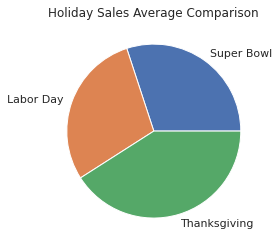

In [26]:
plt.pie(list(holidays_higher_dict.values()) ,labels = list(holidays_higher_dict.keys()));
plt.title('Holiday Sales Average Comparison');

Thanksgiving has the highest mean.

### Research question 4
### Provide a monthly and semester view of sales in units and give insights.

Determining what months saw an increase or decrease in sales.

The Monthly Sales graph shows that the highest amount of sales is recorded between December 2010 and February 2011. 

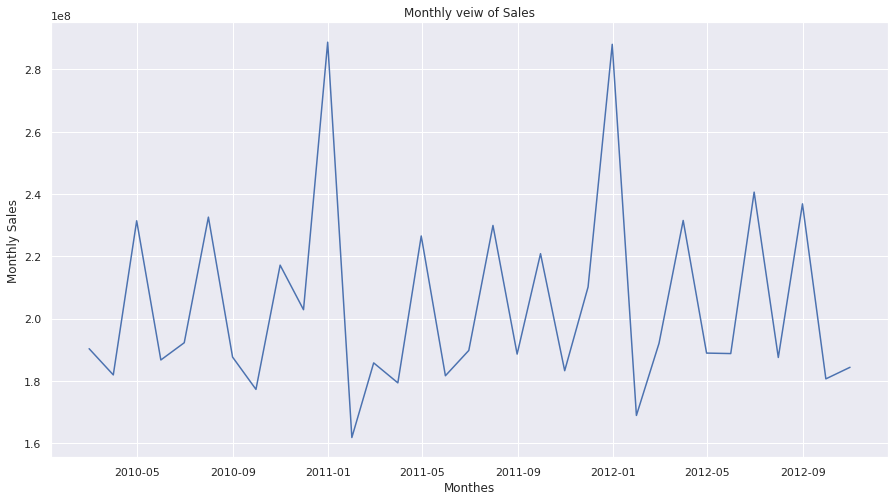

In [27]:
# Grouper function allowa us to group by date datatype with a specified frequency
Monthly_df = df[['Weekly_Sales','Date']].groupby(pd.Grouper(key='Date', freq='1M')).sum().reset_index()
plt.figure(figsize=(15,8))
plt.plot(Monthly_df['Date'], Monthly_df['Weekly_Sales'])
plt.title('Monthly veiw of Sales')
plt.xlabel('Monthes')
plt.ylabel('Monthly Sales');

Determining which months are most likely to have high sales.

We find that December and November has the highest Average Sales while January and September has the lowest Average Sales.

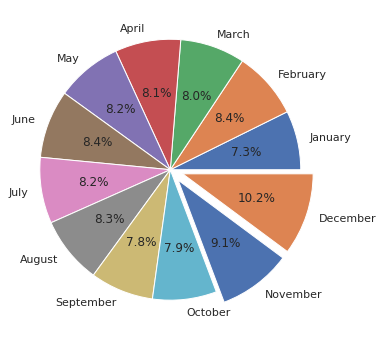

In [28]:
plt.figure(figsize=(6,6))
Date_df = df[['Date','Weekly_Sales','Store']].sort_values('Date')
Date_df['Month'] = Date_df['Date'].dt.month
Month_mean = Date_df.groupby(['Month'])['Weekly_Sales'].mean()
Month_Names_arr = ['January','February','March','April','May','June','July','August','September', 'October', 'November','December']
plt.pie(Month_mean, explode=[0,0,0,0,0,0,0,0,0,0,.1,.1],labels=Month_Names_arr,autopct='%1.1f%%');

Determining what semesters saw an increase or decrease in sales.

According to the semester sales graph, the lowest amount of sales is recorded in 1st semester of 2010 and 2nd semester of 2012.

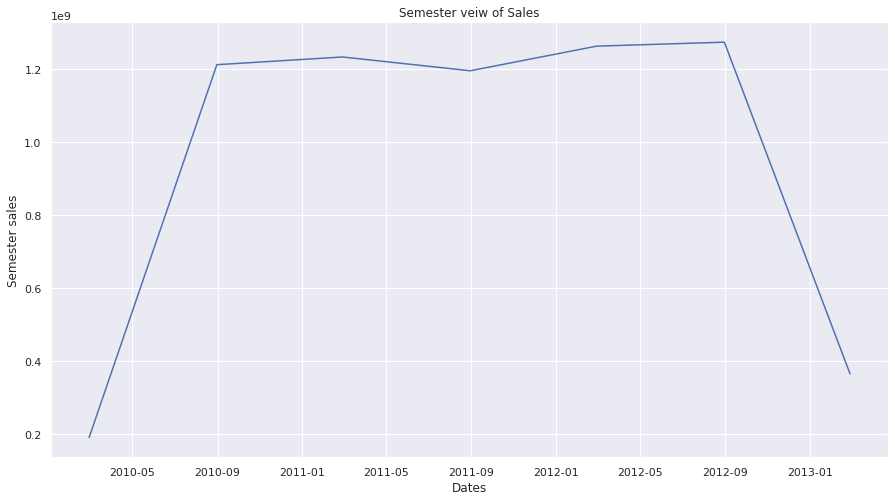

In [29]:
Semester = df[['Date','Weekly_Sales']].groupby(pd.Grouper(key='Date', freq='6M')).sum().reset_index()
plt.figure(figsize=(15,8))
plt.plot(Semester['Date'], Semester['Weekly_Sales'])
plt.title('Semester veiw of Sales')
plt.xlabel('Dates')
plt.ylabel('Semester sales');

Determining which semester is more profitable

We see that Sales are a bit better in the second half of the year than the second

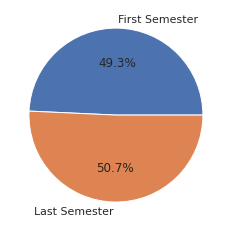

In [41]:
Semester = df[['Date','Weekly_Sales']]
Semester['Month'] = Semester['Date'].dt.month
First_Semester = Semester.query("Month <= 6")
Last_Semester = Semester.query("Month > 6")
Comparison_Array = []
Comparison_Array.append(First_Semester['Weekly_Sales'].sum())
Comparison_Array.append(Last_Semester['Weekly_Sales'].sum())
label_Array = ['First Semester','Last Semester']
plt.pie(Comparison_Array,labels = label_Array ,autopct='%1.1f%%');

### Research question 5
### Plot the relations between weekly sales vs. other numeric features and give insights.

Determining what features have a correlation with the weekly sales.

- From the Temperature plot, there is a very weak negative correlation and almost no correlation between Weekly Sales and Temperature.  
- From the Fuel Price plot, there is a very weak positive correlation and almost no correlation between Weekly Sales and Fuel Price. 
- From the Unemployment plot, there is a very weak negative correlation between Weekly Sales and Unemployment.  
- From the CPI, there is a very weak negative correlation and almost no correlation between Weekly Sales and CPI. Also we notice that there are 2 cluster, one with a CPI around 150 or lower and the other with a CPI around 180 or greater.

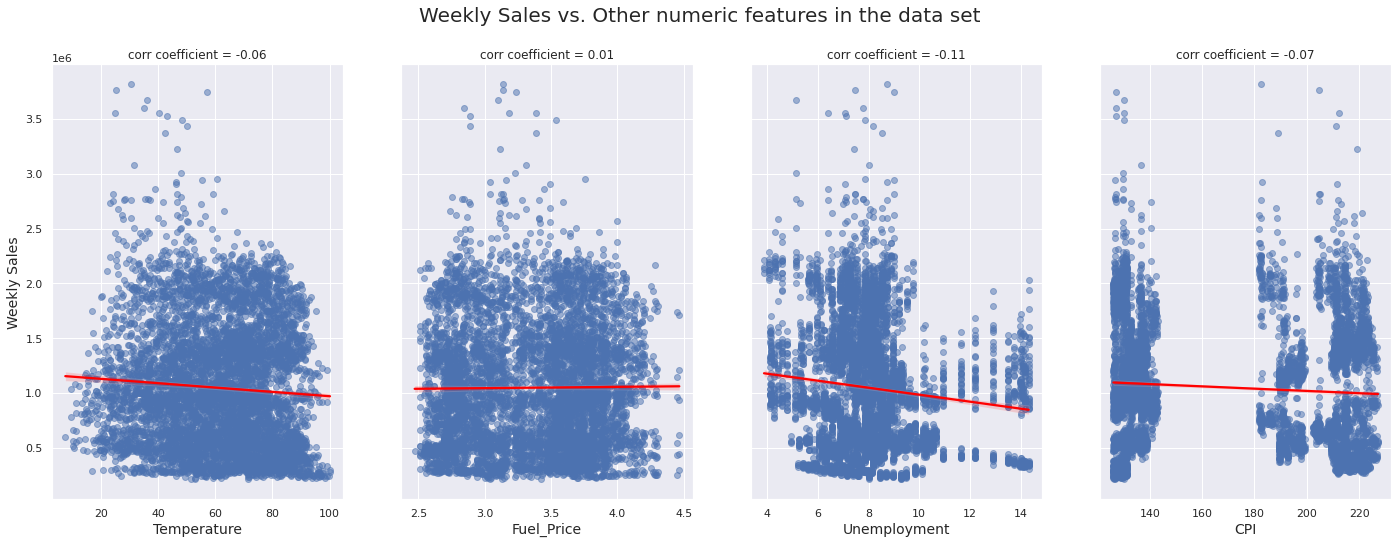

In [31]:
features_list = ['Temperature', 'Fuel_Price', 'Unemployment', 'CPI']

corr_list = list(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'Unemployment', 'CPI']].corr().iloc[0, 1:])

fig, ax = plt.subplots(1,4, figsize=(24, 8), sharey=True)


for i in range(len(features_list)):
    sns.regplot(x=features_list[i], y='Weekly_Sales', data=df, ax=ax[i], line_kws={'color':'red'}, scatter_kws={'alpha':0.5})
    ax[i].set_xlabel(features_list[i], size = 14)
    ax[i].set_ylabel(None)
    ax[i].set_title(f'corr coefficient = {round(corr_list[i], 2)}')

ax[0].set_ylabel('Weekly Sales', size = 14)
fig.suptitle("Weekly Sales vs. Other numeric features in the data set", size = 20);